In [1]:
import pandas as pd
filepath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

dataset = pd.read_csv(filepath, delimiter=";")
dataset.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
dataset.describe()
#need to get_dummies for categorical variables but they are all numeric

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
labels = dataset['quality']
features = dataset.drop(['quality'], axis = 1)
features_names = features.columns


In [4]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2, random_state=23)

In [5]:
#standardize numerical features
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

ct = ColumnTransformer([('standardize', StandardScaler(), features_names)], remainder = 'passthrough')

In [6]:
features_train_scaled = ct.fit_transform(features_train)
features_test_scaled = ct.transform(features_test)

In [7]:
#build the model
from tensorflow.keras.models import Sequential
my_model = Sequential(name = "my_first_model")


In [8]:
#input layer
from tensorflow.keras.layers import InputLayer 
input = InputLayer(input_shape=features.shape[1])
my_model.add(input)

In [9]:
#hidden layer
from tensorflow.keras.layers import Dense
my_model.add(Dense(64, activation = 'relu'))

In [10]:
#output layer
my_model.add(Dense(1))
#print model summary
my_model.summary()

Model: "my_first_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


In [11]:
#adam optimizer
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)

In [12]:
#compile 
my_model.compile(loss='mse', metrics=['mae'], optimizer=opt)

In [13]:
#fit the model
my_model.fit(features_train, labels_train, epochs=40, batch_size=3, verbose=1)

Epoch 1/40
427/427 [==============================] - 1s 965us/step - loss: 4.7136 - mae: 1.0670
Epoch 2/40
427/427 [==============================] - 0s 995us/step - loss: 0.9363 - mae: 0.7344
Epoch 3/40
427/427 [==============================] - 0s 979us/step - loss: 0.8976 - mae: 0.7357
Epoch 4/40
427/427 [==============================] - 0s 983us/step - loss: 0.8116 - mae: 0.6862
Epoch 5/40
427/427 [==============================] - 0s 970us/step - loss: 0.6907 - mae: 0.6500
Epoch 6/40
427/427 [==============================] - 0s 937us/step - loss: 0.6094 - mae: 0.6175
Epoch 7/40
427/427 [==============================] - 0s 936us/step - loss: 0.6014 - mae: 0.6047
Epoch 8/40
427/427 [==============================] - 0s 928us/step - loss: 0.5967 - mae: 0.5988
Epoch 9/40
427/427 [==============================] - 0s 957us/step - loss: 0.6611 - mae: 0.6312
Epoch 10/40
427/427 [==============================] - 0s 951us/step - loss: 0.5914 - mae: 0.6040
Epoch 11/40
427/427 [========

In [14]:
#evaluate the model 
val_mse, val_mae = my_model.evaluate(features_test,labels_test, verbose = 1)

10/10 [==============================] - 0s 1ms/step - loss: 0.4059 - mae: 0.4991


In [15]:
val_mae

0.49911588430404663

In [16]:
val_mse

0.405886709690094

In [17]:
#hyperparameter tuning and more hidden layers
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
def design_model_dropout(features, learning_rate):
    model = Sequential(name="my_second_model")
    input = tf.keras.Input(shape=(features.shape[1],))
    model.add(input)
    
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(24, activation='relu'))
    
    model.add(layers.Dense(1))
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss='mse',metrics=['mae'], optimizer=opt)
    return model

In [18]:
def fit_model(model, features_train, labels_train, learning_rate, num_epochs):
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
    history = model.fit(features_train, labels_train, epochs=num_epochs,batch_size=16,verbose=1,validation_split=0.2, callbacks=[es])
    return history

In [21]:
learning_rate=0.001
num_epochs = 200
history=fit_model(design_model_dropout(features_train,learning_rate), features_train, labels_train, learning_rate, num_epochs)

Epoch 1/200
64/64 [==============================] - 1s 4ms/step - loss: 8.1152 - mae: 2.1157 - val_loss: 1.1494 - val_mae: 0.7865
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 2.7285 - mae: 1.2704 - val_loss: 1.3235 - val_mae: 0.9902
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 1.6859 - mae: 1.0259 - val_loss: 1.8889 - val_mae: 1.2180
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 1.5056 - mae: 0.9649 - val_loss: 1.4351 - val_mae: 1.0113
Epoch 5/200
64/64 [==============================] - 0s 2ms/step - loss: 1.3437 - mae: 0.9118 - val_loss: 1.4821 - val_mae: 1.0367
Epoch 6/200
64/64 [==============================] - 0s 2ms/step - loss: 1.3117 - mae: 0.8967 - val_loss: 1.4210 - val_mae: 1.0335
Epoch 7/200
64/64 [==============================] - 0s 2ms/step - loss: 1.1760 - mae: 0.8516 - val_loss: 2.0226 - val_mae: 1.2770
Epoch 8/200
64/64 [==============================] - 0s 2ms/step - loss: 1.1091 - m

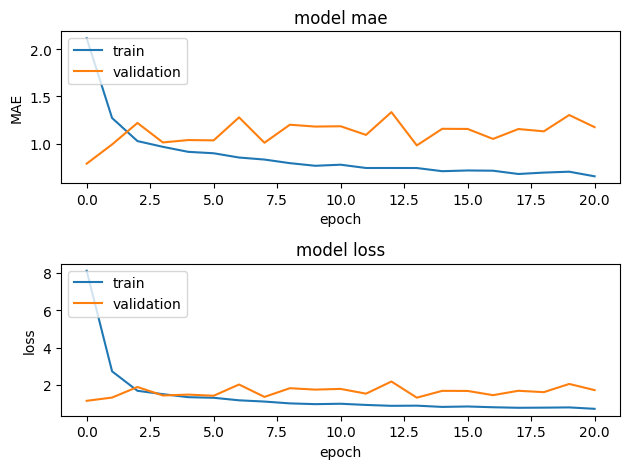

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
 
# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')
 
    
# used to keep plots from overlapping each other  
fig.tight_layout()
plt.show()